In [38]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

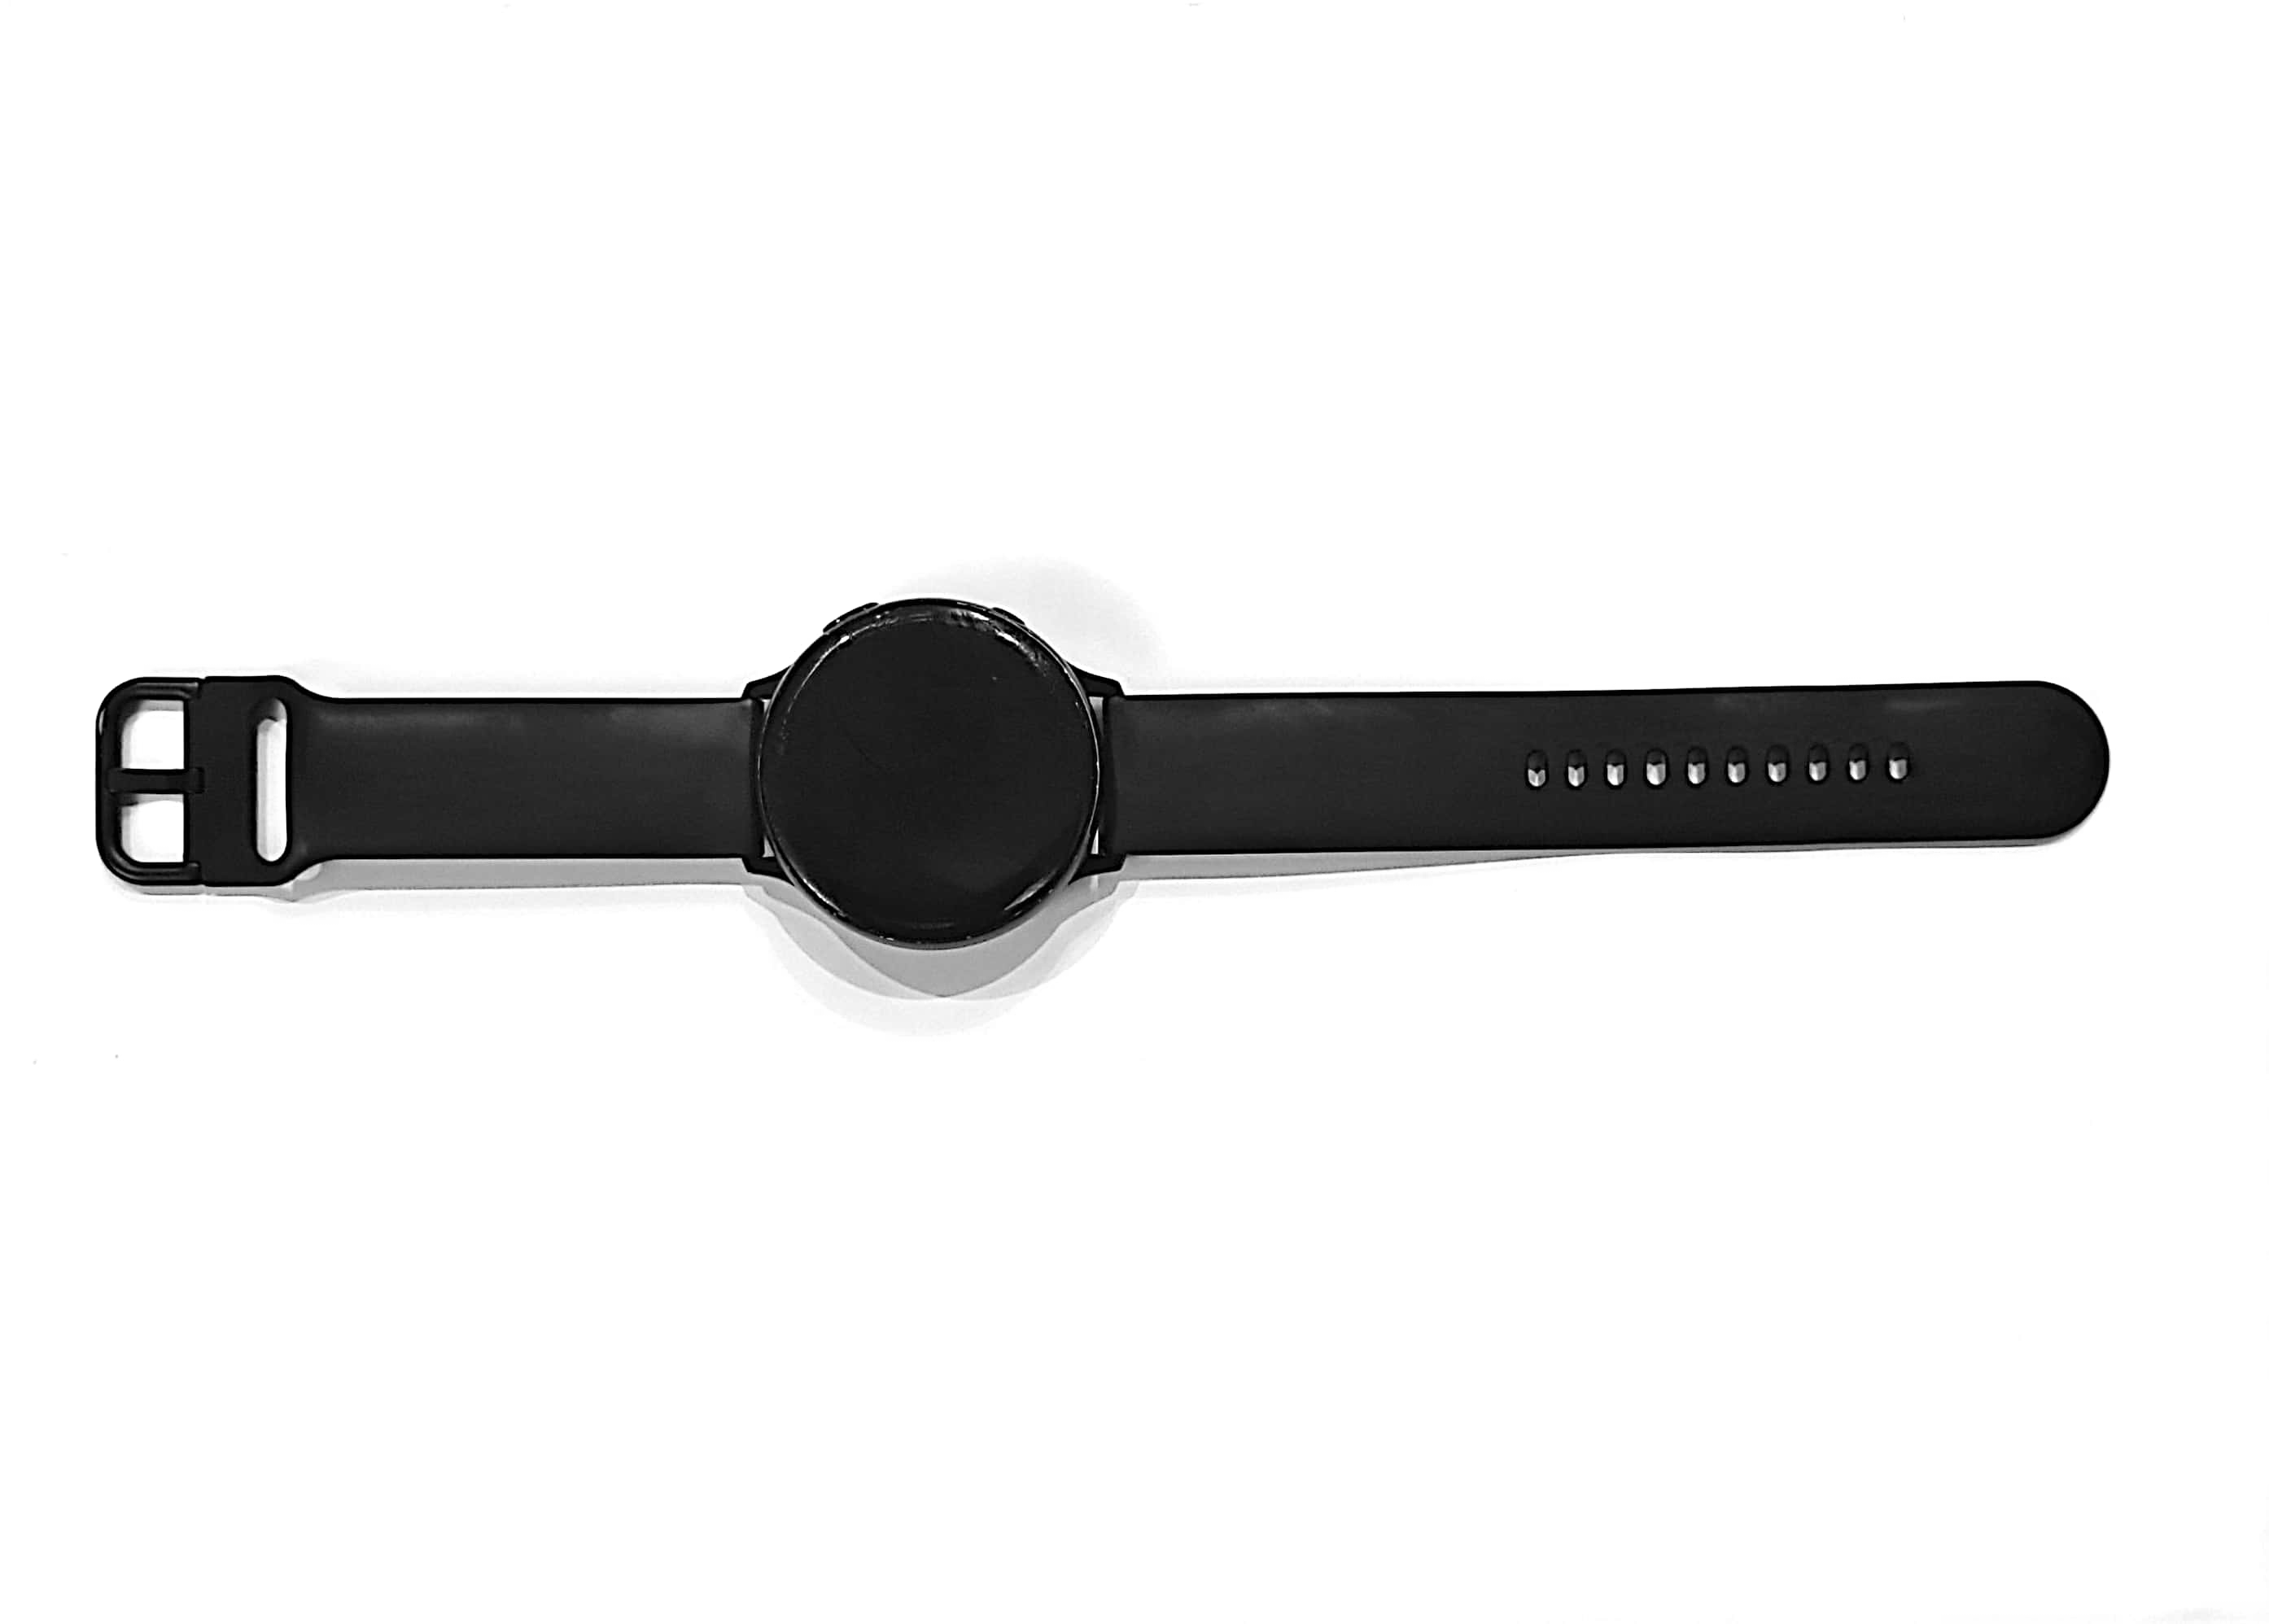

In [12]:
img = cv2.imread('base.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

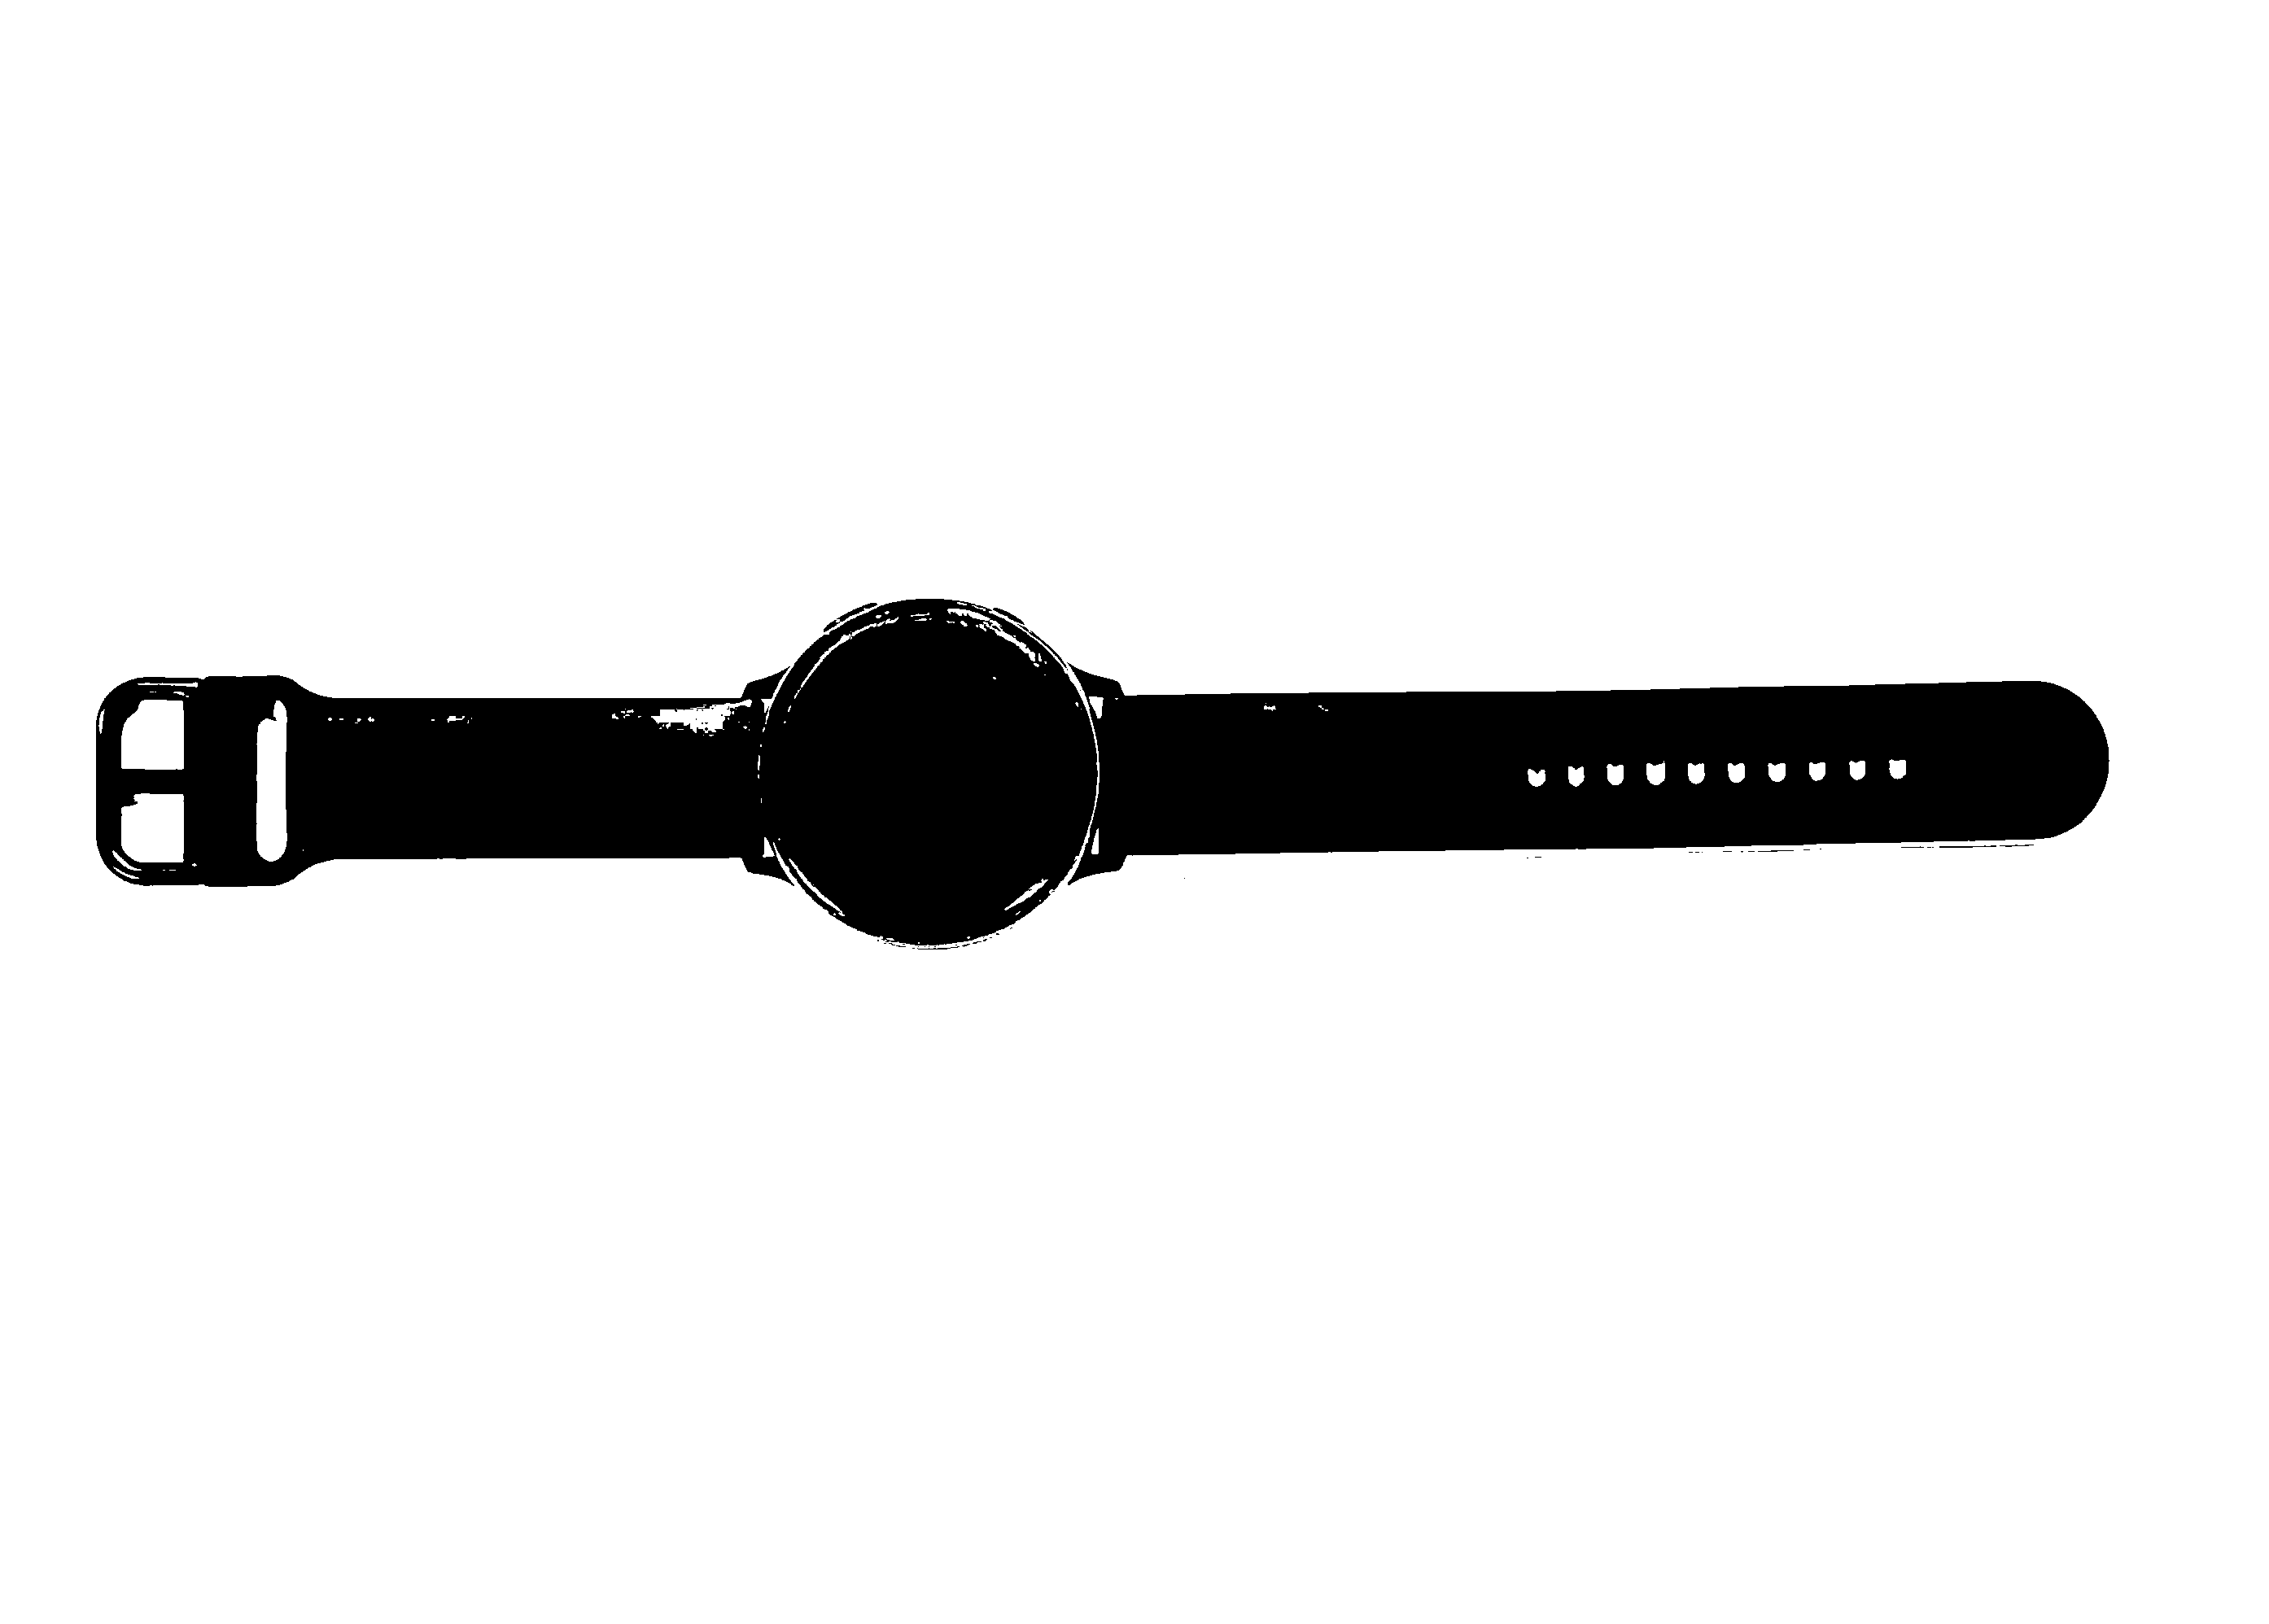

In [23]:
ret, img_b = cv2.threshold(img_gray,70,255,0)
cv2_imshow(img_b)

In [36]:
indices = np.where(img_b == [0])
coordinates = zip(indices[0], indices[1])
data = list(coordinates)
X = pd.DataFrame(data)
X = X.to_numpy()

[440513.29886424   5602.13083511]
[[-0.00991376  0.99995086]
 [ 0.99995086  0.00991376]]


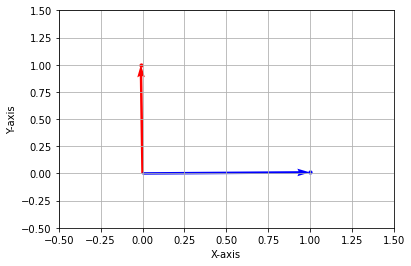

In [73]:
cov_X = np.cov(X.T)

svd = np.linalg.svd(cov_X)
eig_values = svd[1] 
eig_vectors = svd[0] 

idx = eig_values.argsort()[::-1]
eigen_values = eig_values[idx]
eigen_vectors = eig_vectors[:, idx]

origin = [0, 0]

plt.figure()
plt.ylabel('Y-axis')
plt.xlabel('X-axis')
ax = plt.gca()

plt.quiver(*origin, *eigen_vectors[0], color='r', angles='xy', scale_units='xy', scale=1)
plt.quiver(*origin, *eigen_vectors[1], color='b', angles='xy', scale_units='xy', scale=1)

plt.scatter(eigen_vectors[0][0],eigen_vectors[0][1], s=10,c='red')
plt.scatter(eigen_vectors[1][0],eigen_vectors[1][1], s=10,c='blue')

print(eigen_values)
print(eigen_vectors)

ax.set_xlim([-0.5, 1.5])
ax.set_ylim([-0.5, 1.5])

plt.grid()
plt.draw()
plt.show()